In [154]:
import os
import json
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
%config InlineBackend.figure_format ='retina'

sns.set(font_scale=1.5)

sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

In [156]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [157]:
repos = ['Desenvolvimento']

language = [['Desenvolvimento', 'js']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [158]:
jsons = glob('data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/*.json')

In [159]:
jsons

['data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/fga-eps-mds-2020.2-Violeta-Desenvolvimento-date_v1.11.0.json',
 'data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/fga-eps-mds-2020.2-Violeta-Desenvolvimento-date_v1.01.0.json',
 'data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/fga-eps-mds-2020.2-Violeta-Desenvolvimento-date_v1.10.2.json',
 'data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/fga-eps-mds-2020.2-Violeta-Desenvolvimento-date_v1.07.1.json',
 'data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/fga-eps-mds-2020.2-Violeta-Desenvolvimento-date_v1.09.0.json',
 'data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/fga-eps-mds-2020.2-Violeta-Desenvolvimento-date_v1.05.0.json',
 'data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/fga-eps-mds-2020.2-Violeta-Desenvolvimento-date_v2.00.0.json',
 'data/fga-eps-mds-2020-2-data/violeta/analytics-raw-data/fga-eps-mds-2020.2-Violeta-Desenvolvimento-date_v1.07.0.json',
 'data/fga-eps-mds-2020-2-data/v

In [160]:
def read_json(json_path):

    with open(json_path) as json_file:
        json_obj = json.load(json_file)

    return json_obj

In [161]:
def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-2020.2-Violeta-(.*?)-date_(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [162]:
base_component_df = create_base_component_df(jsons)

In [163]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
96,complexity,79,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
97,duplicated_lines_density,11.8,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
98,functions,54,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
99,ncloc,1523,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
100,reliability_rating,1.0,True,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
101,security_rating,1.0,True,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
102,comment_lines_density,18.1,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
103,files,69,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
8,complexity,79,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0
9,duplicated_lines_density,11.8,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0


In [164]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [165]:
def metric_per_file(json):

    file_json = []

    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)

    return file_json

In [166]:
def generate_file_dataframe(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [167]:
def generate_file_dataframe_per_release(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [168]:
def create_file_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        file_component_data = metric_per_file(file_component)
        file_name = os.path.basename(i)

        file_repository = file_name.split("-")[5]
        file_language = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list,
                                                                file_component_data,
                                                                language_extension = file_language)
        file_component_df['filename'] = file_name

        df = df.append(file_component_df, ignore_index=True)

    # replace TeamName by yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020.2-Violeta-(.*?)-date_(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [169]:
file_component_df = create_file_df(jsons)

In [170]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
224,frontend/src/App.js,1,1,0.0,0.0,NaN,19,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
225,frontend/src/App.test.js,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
226,frontend/src/components/footer.js,1,1,0.0,0.0,NaN,57,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
227,frontend/src/components/header.js,3,5,0.0,0.0,NaN,44,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
228,frontend/src/components/home.js,1,1,0.0,0.0,NaN,21,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
229,frontend/src/index.js,0,0,30.0,0.0,NaN,7,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
230,frontend/src/components/questionario.js,5,5,2.9,0.0,NaN,99,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
231,frontend/src/serviceWorker.js,15,32,19.1,0.0,NaN,93,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
26,frontend/src/App.js,1,1,0.0,0.0,NaN,19,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0
27,frontend/src/App.test.js,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0


In [171]:
# Create dataframe per repository

repository_dataframes = {}

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df

repository_dataframes.keys()

dict_keys(['Desenvolvimento'])

#### COMPLEXITY

In [172]:
def m1(df):

    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)

    return density_non_complex_files

#### COMMENTS

In [173]:
def m2(df):

    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)

    return density_comment_files

#### DUPLICATIONS

In [174]:
def m3(df):

    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)

    return duplication

In [175]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)

    return ncloc

In [176]:
# Calculating m1, m2 and m3 for each repository

def create_metrics_df(df):

    version_vec = df['version'].unique()

    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []

    metrics_df = pd.DataFrame()

    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list,
                               'version': version_list})

    return metrics_df

In [177]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [178]:
repository_dataframes["Desenvolvimento"].head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
224,frontend/src/App.js,1,1,0.0,0.0,NaN,19,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
225,frontend/src/App.test.js,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
226,frontend/src/components/footer.js,1,1,0.0,0.0,NaN,57,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
227,frontend/src/components/header.js,3,5,0.0,0.0,NaN,44,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
228,frontend/src/components/home.js,1,1,0.0,0.0,NaN,21,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
229,frontend/src/index.js,0,0,30.0,0.0,NaN,7,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
230,frontend/src/components/questionario.js,5,5,2.9,0.0,NaN,99,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
231,frontend/src/serviceWorker.js,15,32,19.1,0.0,NaN,93,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.00.0
26,frontend/src/App.js,1,1,0.0,0.0,NaN,19,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0
27,frontend/src/App.test.js,1,1,0.0,0.0,NaN,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.01.0


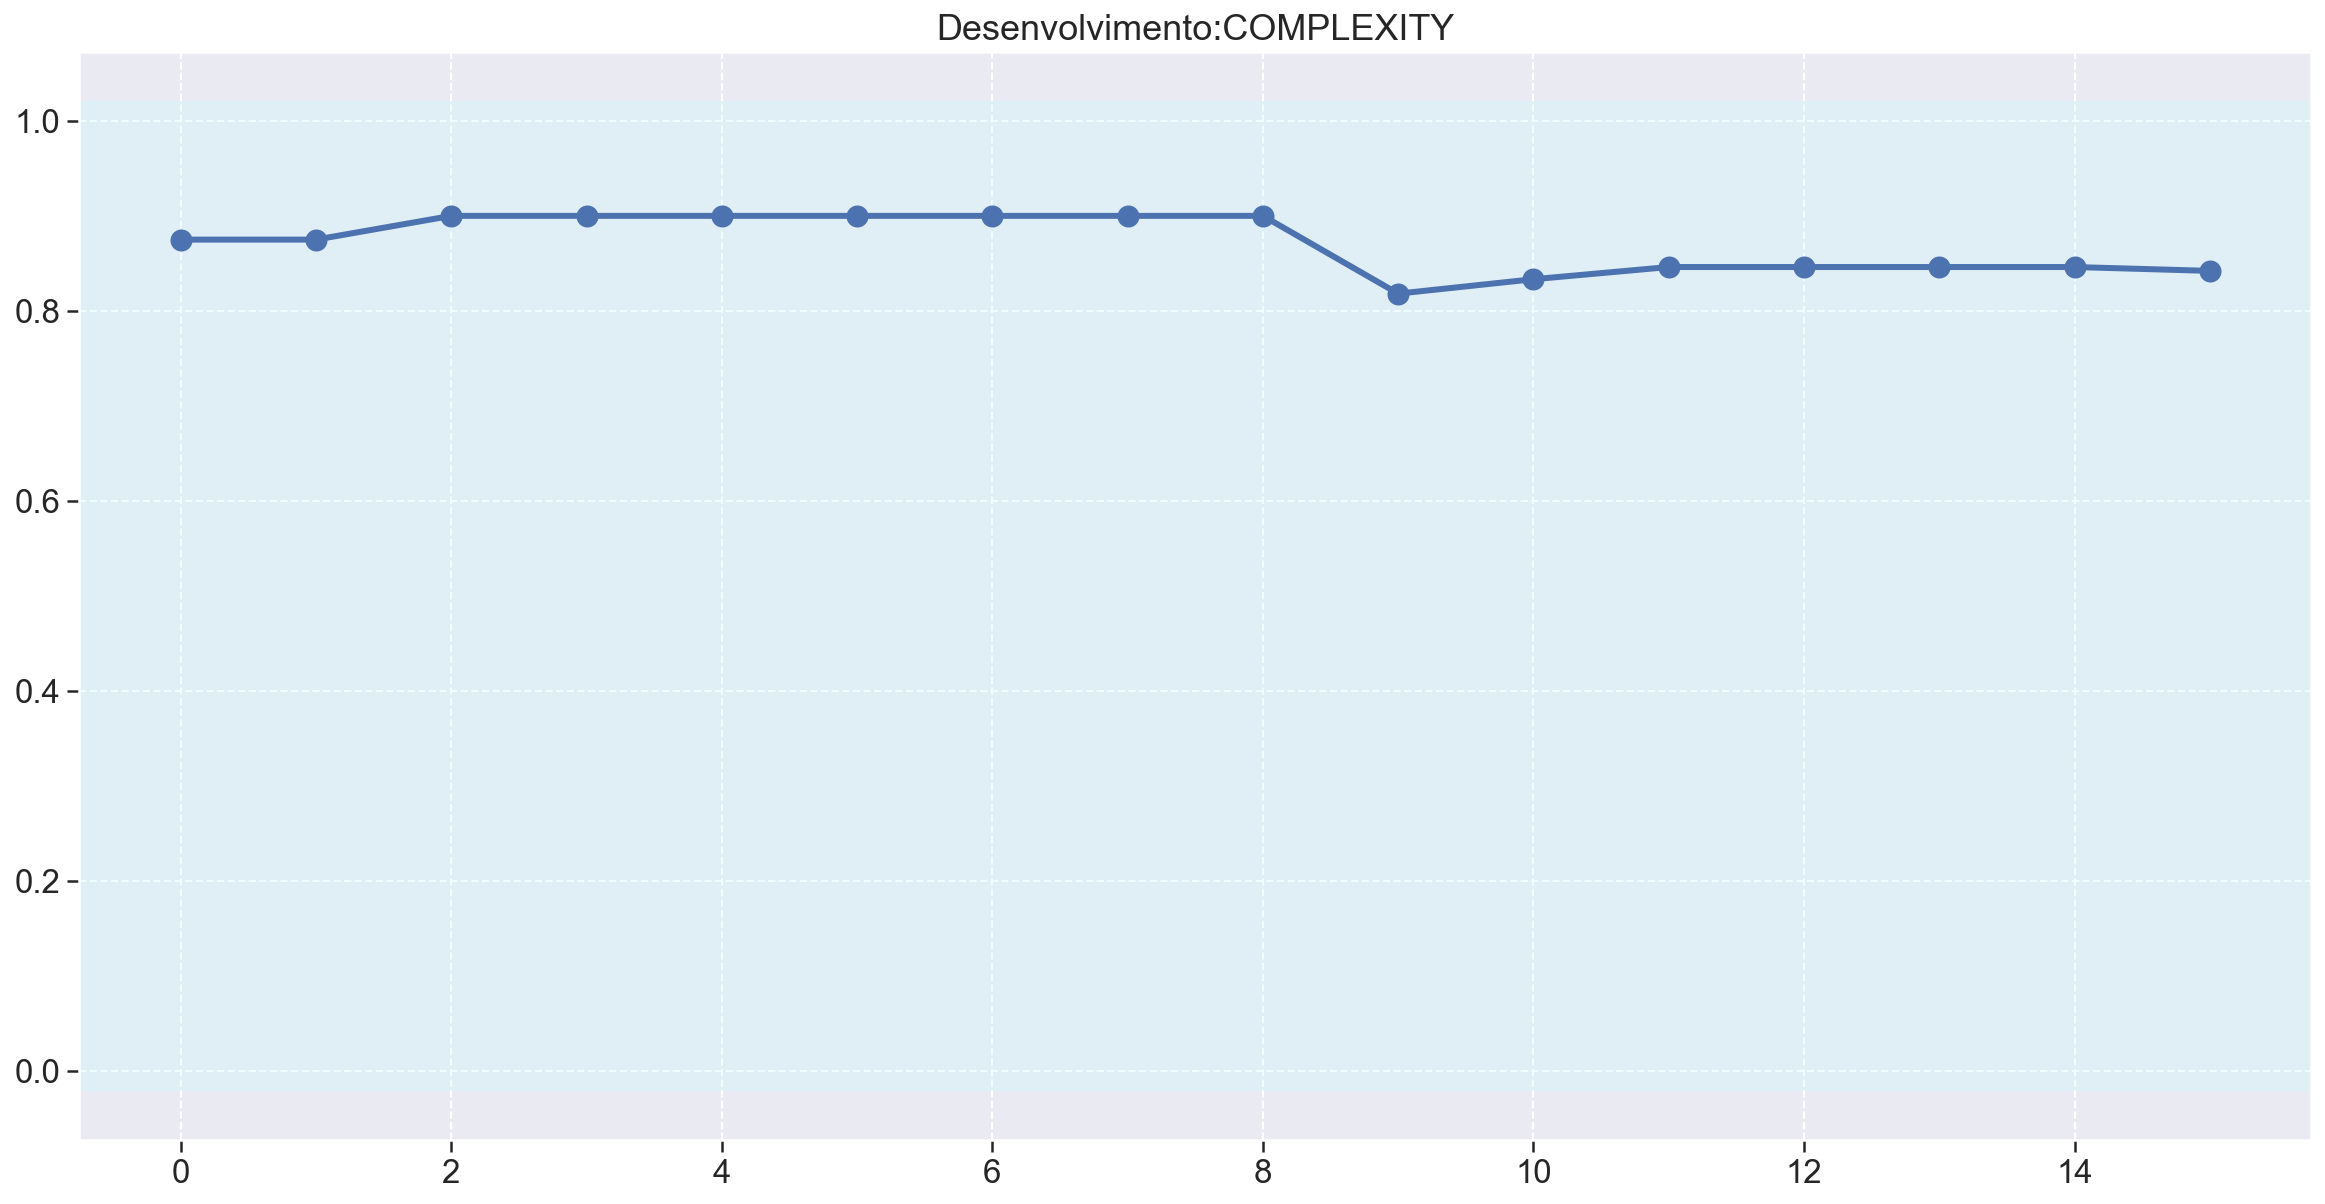

In [179]:
repository_metrics["Desenvolvimento"]

for repository, metrics_df in repository_metrics.items():
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)
    # Background color
    plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

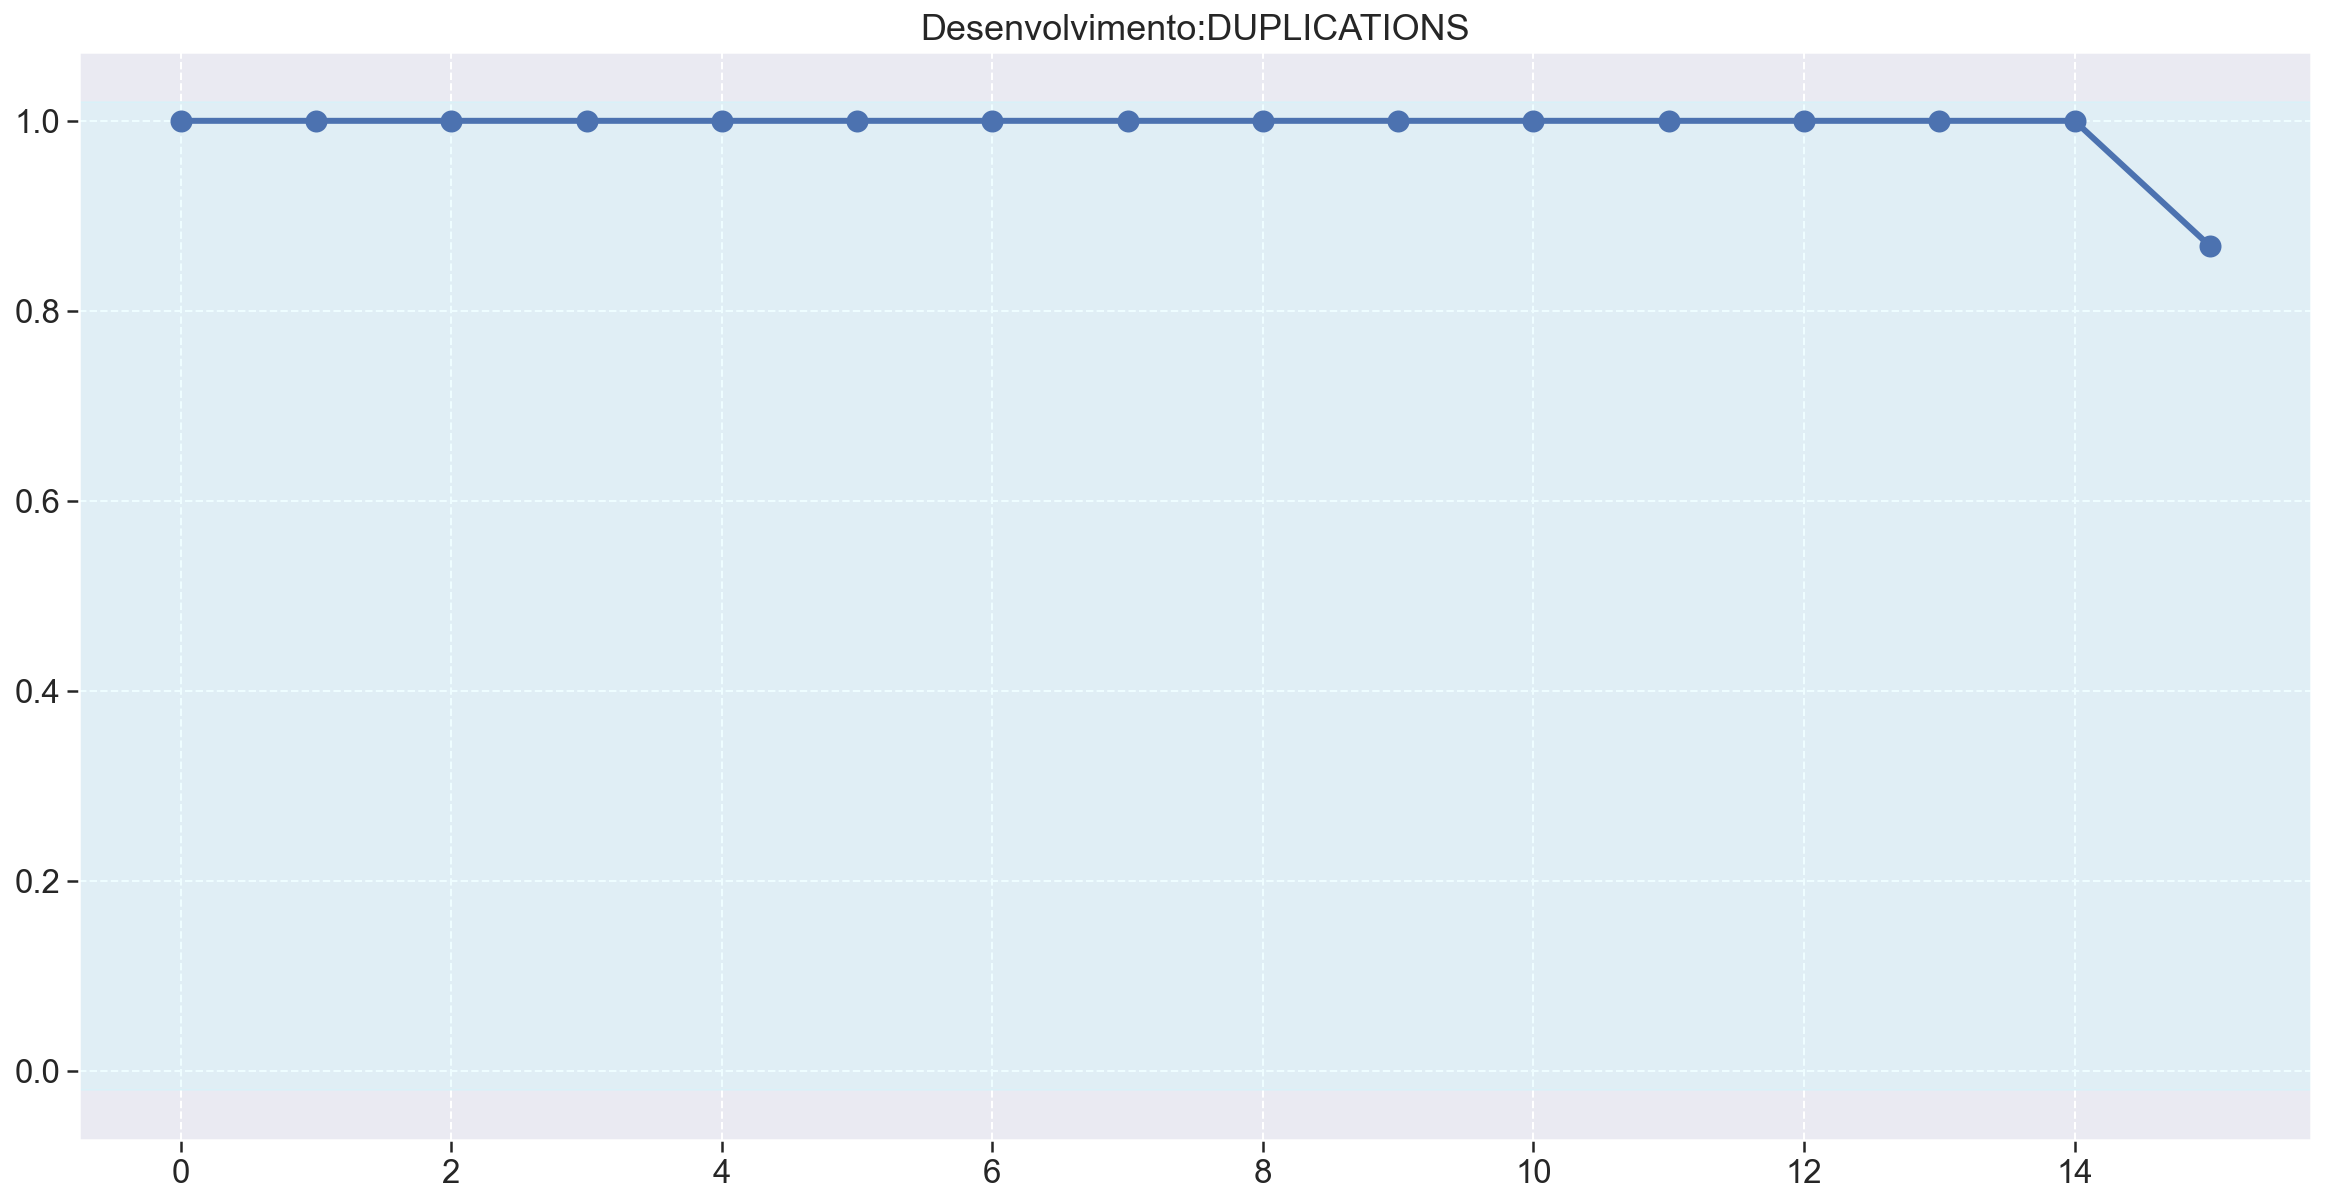

In [180]:
for repository, metrics_df in repository_metrics.items():
    fig = plt.figure(figsize=(20, 10))
    # Background color
    plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

## Repository: Desenvolvimento

#### All metrics

(-0.02, 1.02)

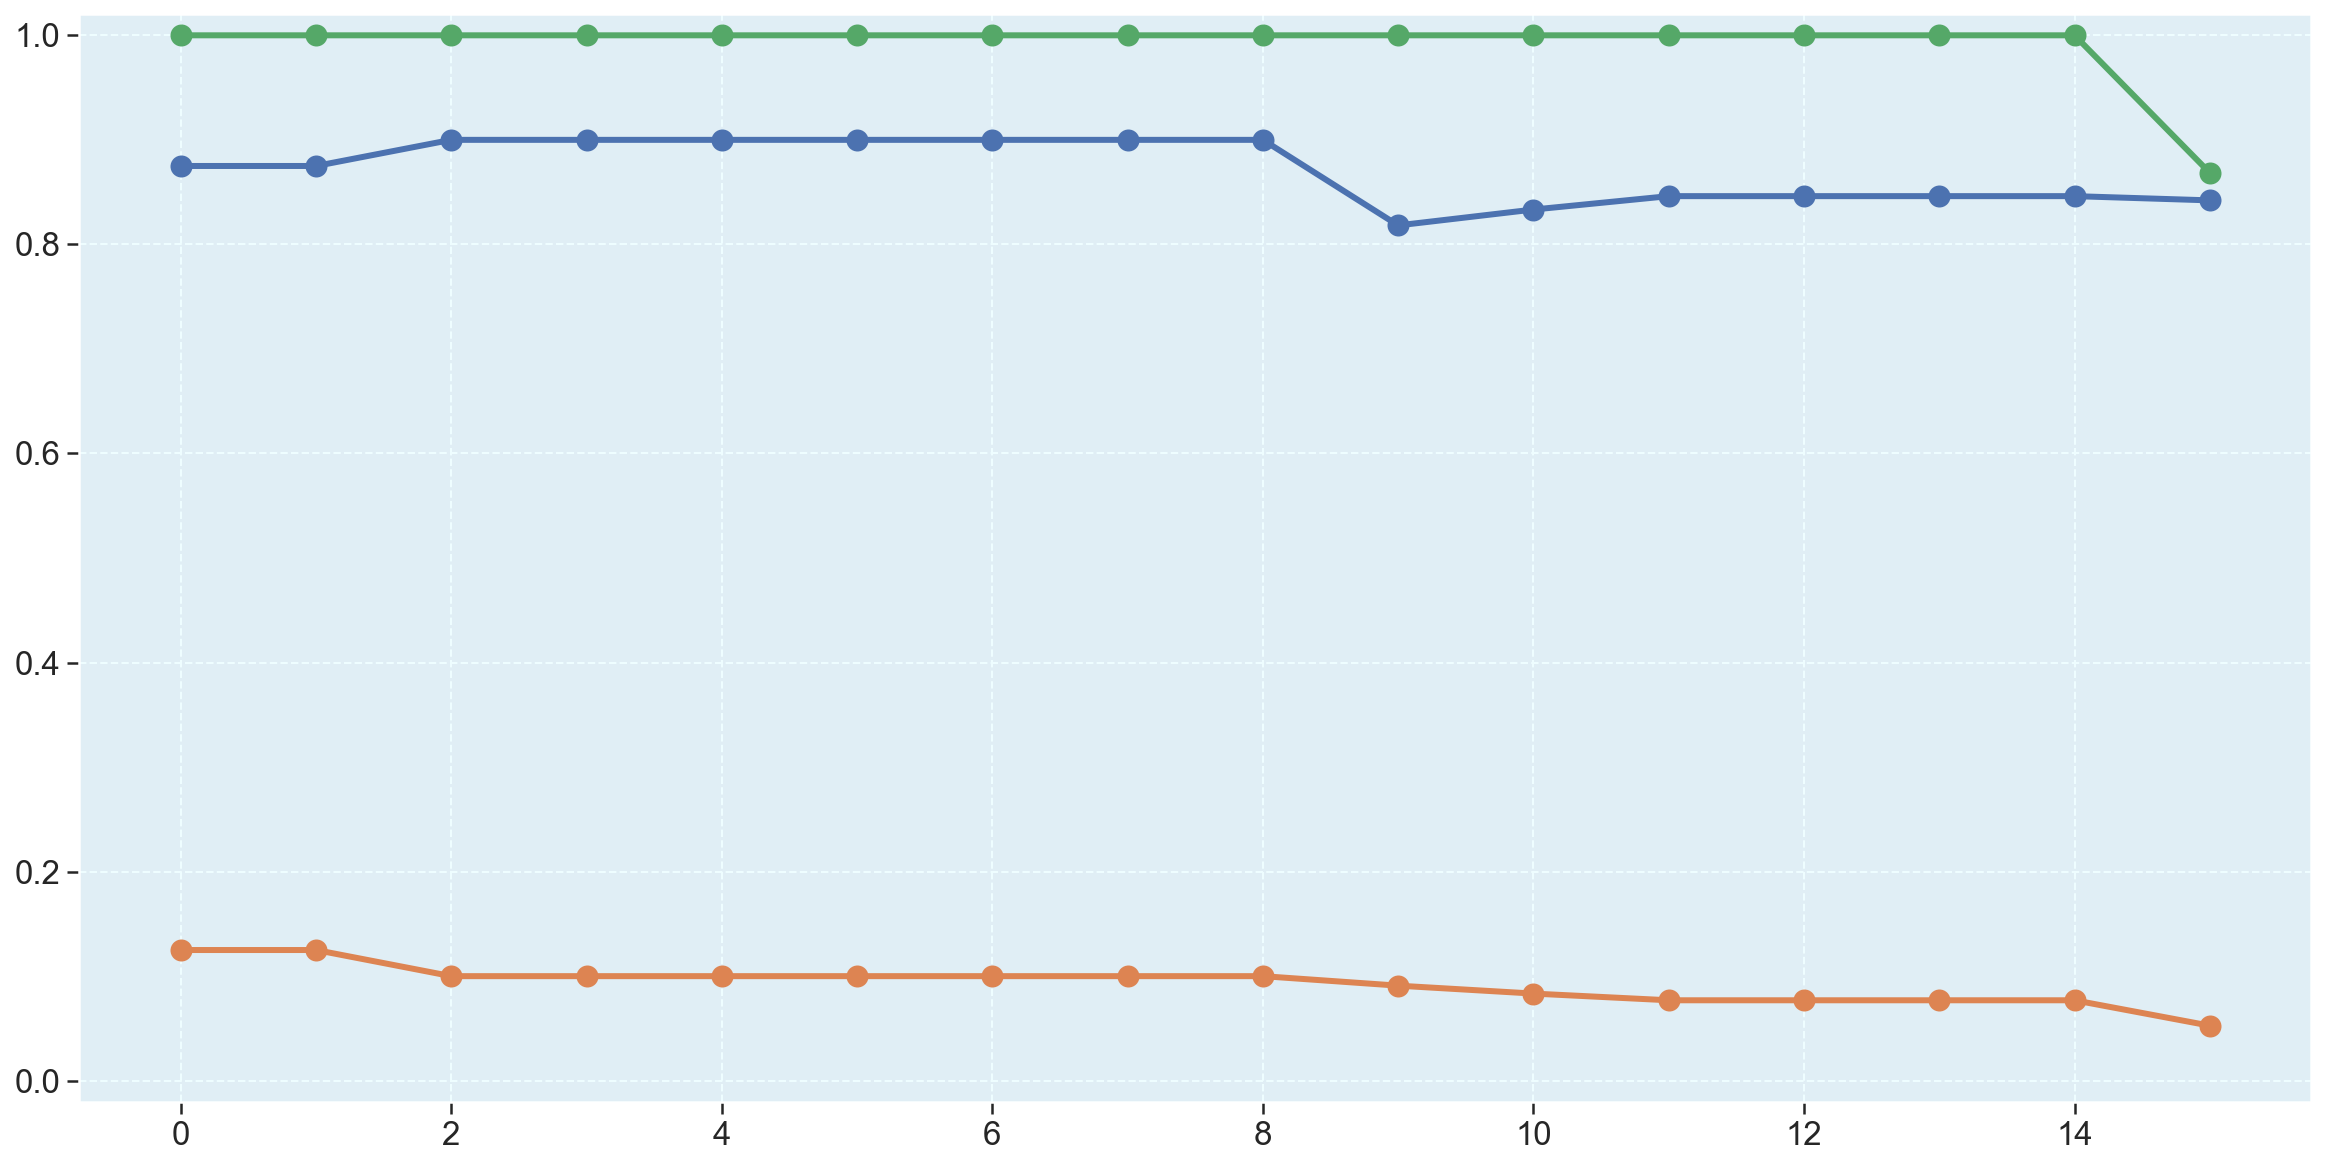

In [181]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["Desenvolvimento"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Desenvolvimento"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Desenvolvimento"]['m3'], linewidth=3, marker='o', markersize=10)

plt.ylim(-.02,1.02)

### Ponderação e Agregação na SubCaracterística

In [182]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

repository_metrics["Desenvolvimento"]['asc1'] = ((repository_metrics["Desenvolvimento"]['m1']*pm1)+
                                                                   (repository_metrics["Desenvolvimento"]['m2']*pm2)+
                                                                   (repository_metrics["Desenvolvimento"]['m3']*pm3)) * psc1

(0.45, 0.7)

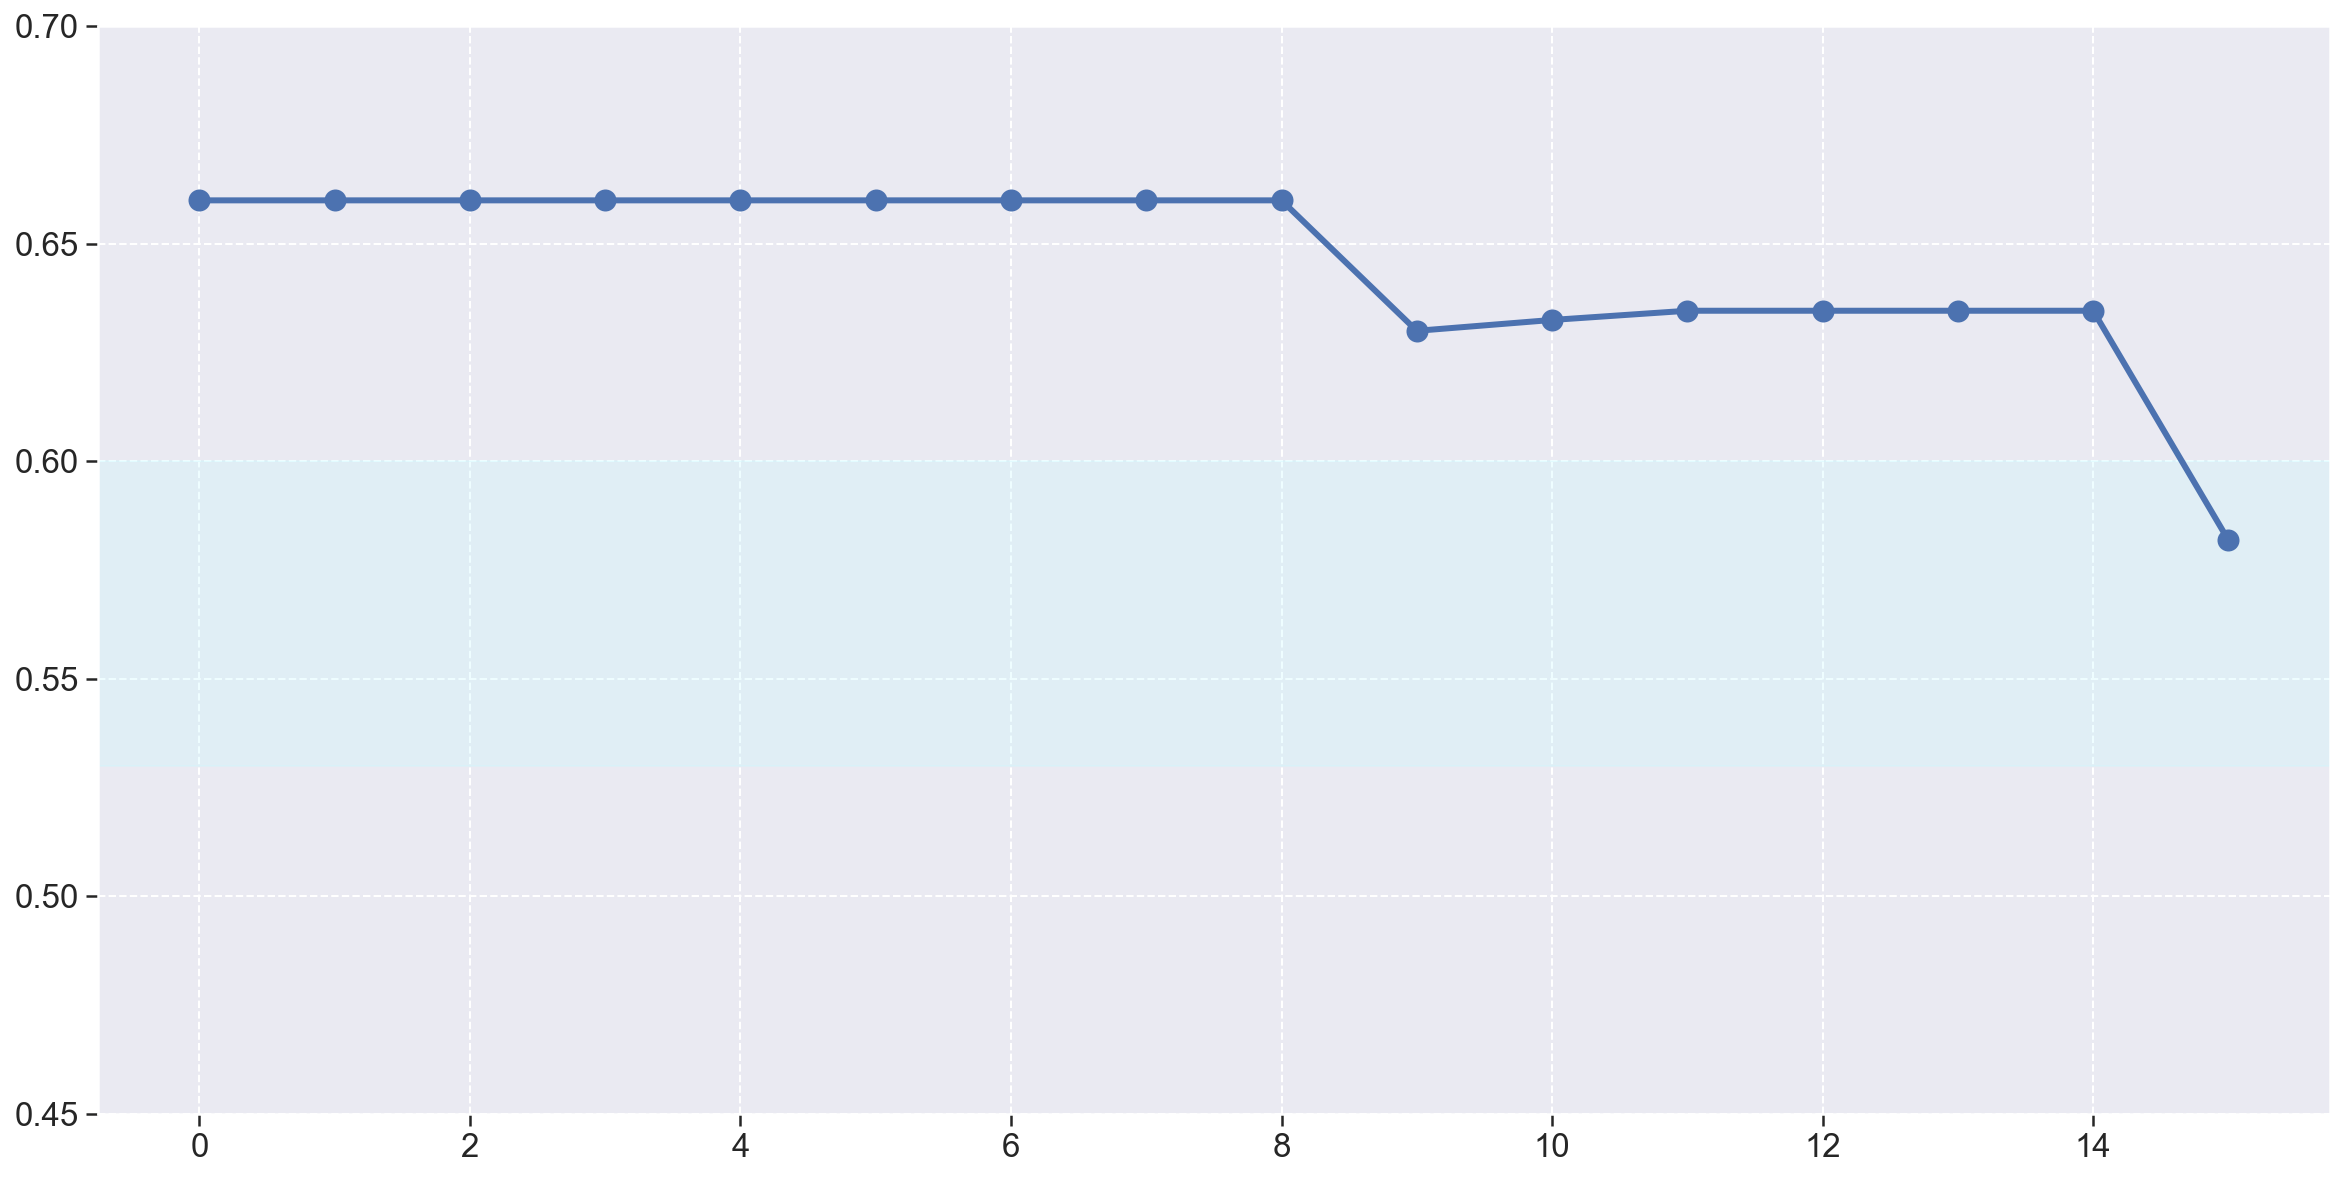

In [183]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["Desenvolvimento"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.53,.6, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

In [184]:
metrics_df = pd.concat([repository_metrics["Desenvolvimento"]], ignore_index=True)

In [185]:
metrics_df['ac1'] = metrics_df['asc1'] * 1
metrics_df['total'] = metrics_df['asc1'] * 1

In [186]:
metrics_df

,m1,m2,m3,repository,version,asc1,ac1,total
0,0.875000,0.125000,1.000000,Desenvolvimento,v1.00.0,0.660000,0.660000,0.660000
1,0.875000,0.125000,1.000000,Desenvolvimento,v1.01.0,0.660000,0.660000,0.660000
2,0.900000,0.100000,1.000000,Desenvolvimento,v1.04.0,0.660000,0.660000,0.660000
3,0.900000,0.100000,1.000000,Desenvolvimento,v1.05.0,0.660000,0.660000,0.660000
4,0.900000,0.100000,1.000000,Desenvolvimento,v1.06.0,0.660000,0.660000,0.660000
5,0.900000,0.100000,1.000000,Desenvolvimento,v1.07.0,0.660000,0.660000,0.660000
6,0.900000,0.100000,1.000000,Desenvolvimento,v1.07.1,0.660000,0.660000,0.660000
7,0.900000,0.100000,1.000000,Desenvolvimento,v1.07.2,0.660000,0.660000,0.660000
8,0.900000,0.100000,1.000000,Desenvolvimento,v1.07.3,0.660000,0.660000,0.660000
9,0.818182,0.090909,1.000000,Desenvolvimento,v1.08.0,0.630000,0.630000,0.630000


In [187]:
metrics_df.to_excel('data/fga-eps-mds-2020-2-data/violeta/qrapids-violeta-dataset-23-03-2021-24-05-2021-xlsx.xlsx', index = False)
metrics_df.to_csv('data/fga-eps-mds-2020-2-data/violeta/qrapids-violeta-dataset-23-03-2021-24-05-2021-csv.csv', header=False, index = False)


